# Logistic Regression Project¶
In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes
    
'Age': cutomer age in years
    
'Area Income': Avg. Income of geographical area of consumer
    
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
    
'Ad Topic Line': Headline of the advertisement
    
'City': City of consumer
    
'Male': Whether or not consumer was male
    
'Country': Country of consumer
    
'Timestamp': Time at which consumer clicked on Ad or closed window
    
'Clicked on Ad': 0 or 1 indicated clicking on Ad
    
Import Libraries
Import a few libraries you think you'll need (Or just import them as you go along!)

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
import pandas as pd

ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [ ]:
ad_data.describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

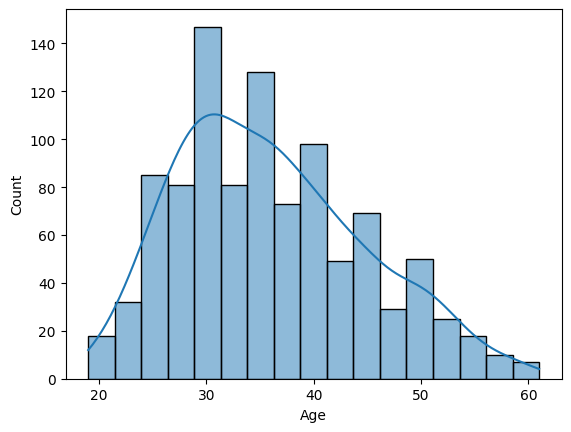

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(ad_data['Age'], kde=True, bins='auto')
plt.show()

**Create a jointplot showing Area Income versus Age.**

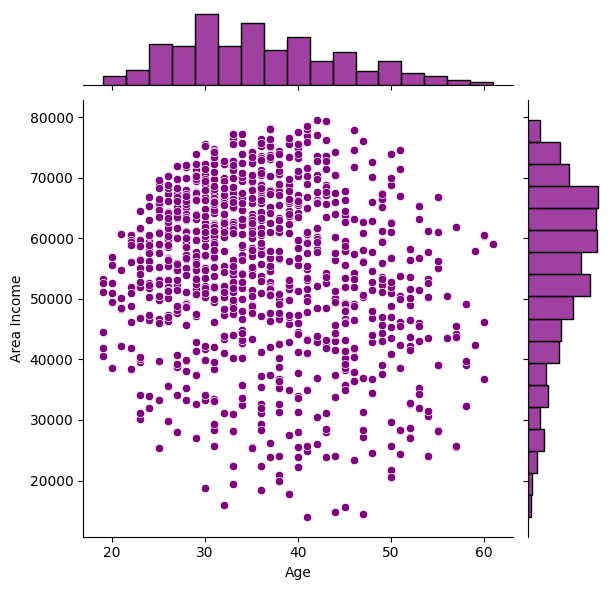

In [24]:
sns.jointplot(x='Age', y='Area Income', data=ad_data, color='purple')
plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

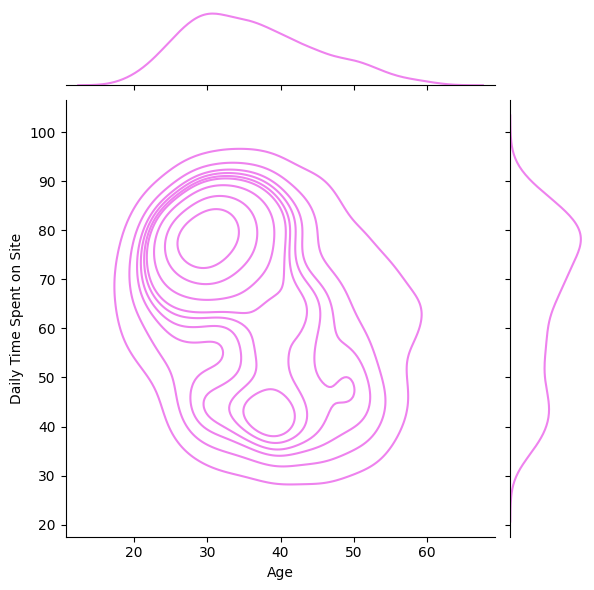

In [27]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, color='violet', kind='kde')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

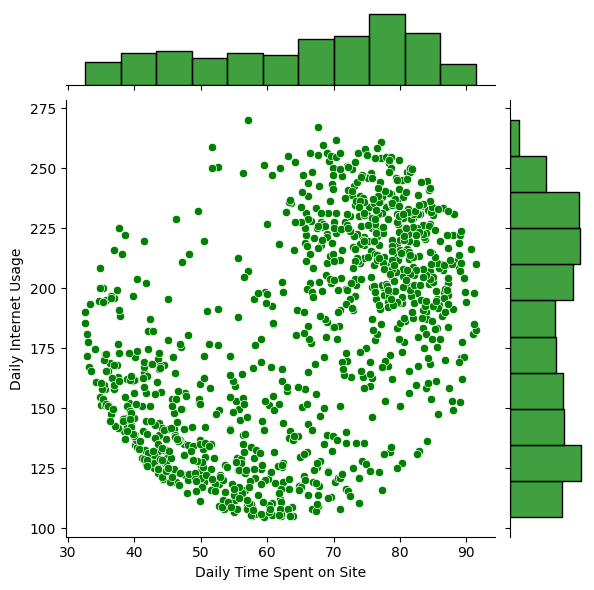

In [13]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

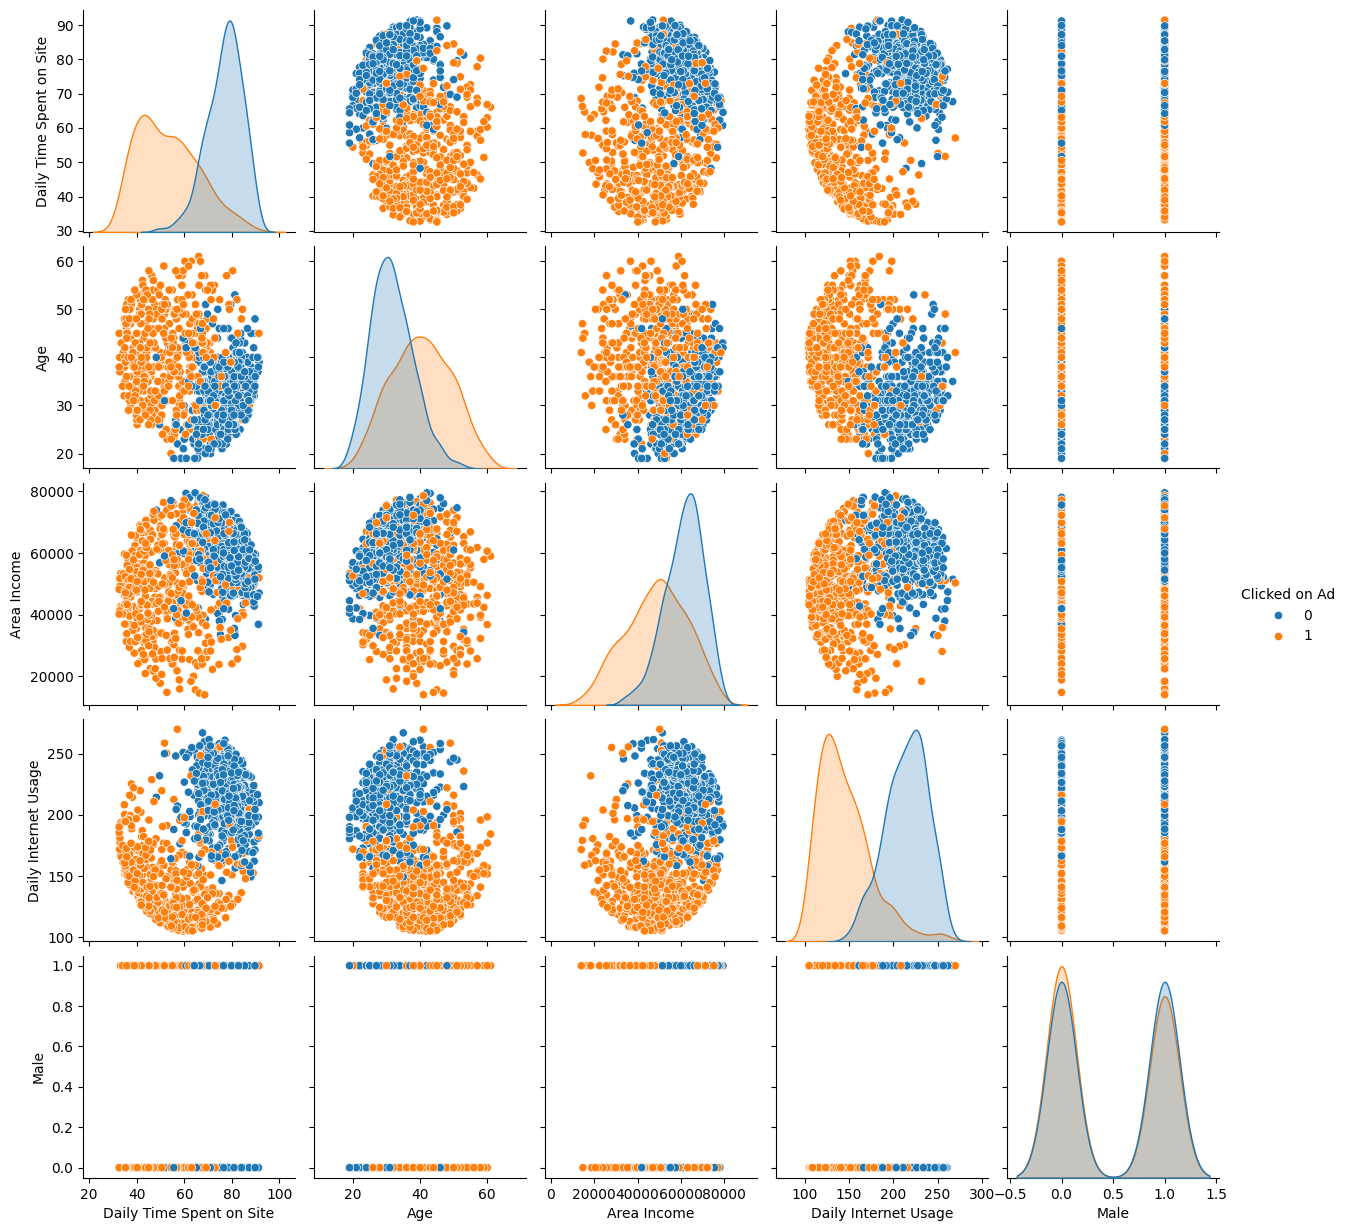

In [14]:
sns.pairplot(ad_data, hue='Clicked on Ad')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select features for the model (excluding non-numeric and unnecessary columns)
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Check the shape of our training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (700, 5)
Testing set shape: (300, 5)


** Train and fit a logistic regression model on the training set.**

In [18]:
# Create and train the logistic regression model
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
# Print the model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, logmodel.coef_[0]):
    print(f"{feature}: {coef:.4f}")
    

Model Coefficients:
Daily Time Spent on Site: -0.1920
Age: 0.1776
Area Income: -0.0001
Daily Internet Usage: -0.0718
Male: -0.7599


## Predictions and Evaluations
** Now predict values for the testing data.**

In [20]:
# Make predictions on the test set
predictions = logmodel.predict(X_test)

# Calculate and print accuracy score
print("Model Accuracy:", logmodel.score(X_test, y_test))

Model Accuracy: 0.9666666666666667


** Create a classification report for the model.**

In [21]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       146
           1       0.97      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



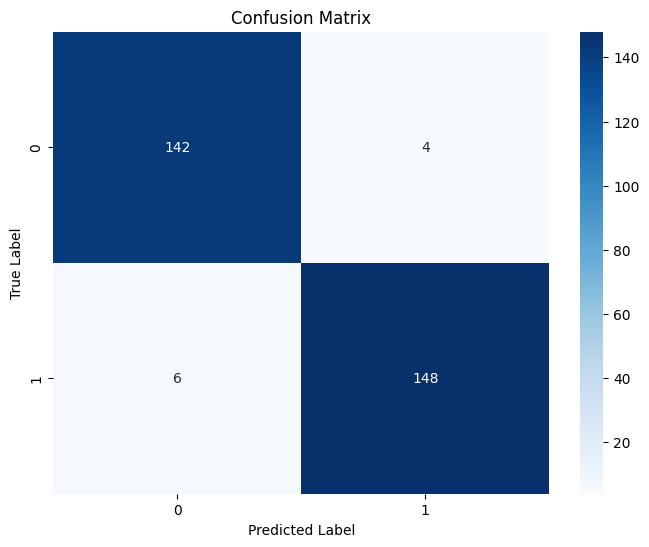

In [22]:
# Create and plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Great Job!